# FIT5196 Assessment 2
#### Student Name: Vyom Chauhan
#### Student ID: 30830192

Date: 21/10/2020

Version: 1.0

Environment: Python 3.6.0 and Anaconda 4.3.0 (64-bit)

Libraries used:
- pandas
- numpy
- nltk
- nltk.sentiment.vader
- seaborn


## 1. Introduction
The assignment has the following tasks:
- Detect and fix errors in 30830192_dirty_data.csv
- Detect and remove outlier rows in 30830192_outlier_data.csv with respect to delivery_charges
- Impute the missing values in 30830192_missing_data.csv

## 2.  Import libraries 

In [1]:
# Basic scientific python libraries
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)

## 3. Examining and loading data

The input files of dirty_data, missing_data, outlier_data and warehouse in csv formats are read and stored as a dataframe.

In [3]:
# reading the input files
dirty_data = pd.read_csv('30830192_dirty_data.csv')
outlier_data = pd.read_csv('30830192_outlier_data.csv')
missing_data = pd.read_csv('30830192_missing_data.csv')
warehouse = pd.read_csv('warehouses.csv')

#### The dirty_data file has 500 rows and 16 columns. The first 5 rows of the dirty_data file have been displayed below.

In [4]:
# display shape of the dirty_data
print(dirty_data.shape)
# first 5 rows of dirty_data
dirty_data.head()

(500, 16)


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD405753,ID3202364313,2019-10-05,Thompson,"[('Lucent 330S', 2), ('pearTV', 1)]",8770,103.35,-37.815399,144.957489,25,6680.85,Spring,True,0.9653,awesome this is a great phone for it's price.,True
1,ORD269977,ID0233274930,2019-03-01,Nickolson,"[('pearTV', 1), ('Alcon 10', 2), ('Universe No...",31110,82.52,-37.807989,144.975727,10,28081.52,Autumn,True,1.2996,None,True
2,ORD014605,ID0122705650,2019-05-23,Thompson,"[('Universe Note', 1), ('Lucent 330S', 1), ('T...",14180,50.90,-37.821712,144.952560,15,12103.90,Autumn,True,1.1160,one star just don't buy you'll thank me,False
3,ORD101531,ID4520380504,2019-02-21,Thompson,"[('Universe Note', 2), ('Alcon 10', 2)]",24800,92.21,-37.811777,144.956457,5,23652.21,Summer,True,1.3621,four stars the item is working fine,True
4,ORD152435,ID6167279402,2019-20-04,Nickolson,"[('Alcon 10', 2), ('Lucent 330S', 1), ('iStrea...",19280,51.61,-37.810368,144.960934,5,18367.61,Autumn,False,1.1887,"don’t buy item arrived with cracked screen, no...",False


In [5]:
# the data type and non-null counts for different columns in dirty_data
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

#### The summary statistics of both the numerical and categorical columns of the dirty_data file have been shown below. We can observe some anomalies in the customer_lat and the customer_long columns by examining the minimum and maximum values. 

In [6]:
# summary stats for dirty data columns(numeric)
dirty_data.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,13477.980000,76.239040,-27.942212,135.097053,10.890000,12179.077300,1.072540
std,8005.040942,14.646582,41.353189,41.353238,8.438027,7186.359177,0.469844
min,730.000000,45.910000,-37.827738,-37.826018,0.000000,652.860000,0.046900
25%,7116.250000,65.645000,-37.818156,144.949317,5.000000,6271.225000,0.729525
50%,12497.500000,76.375000,-37.812058,144.963150,10.000000,11512.675000,1.057850
75%,18966.250000,83.432500,-37.805216,144.982361,15.000000,16654.932500,1.373925
max,43520.000000,111.910000,145.009558,145.015651,25.000000,37361.420000,2.781600


In [7]:
# summary stats for dirty data columns(categorical)
dirty_data.describe(include=['O'])

,order_id,customer_id,date,nearest_warehouse,shopping_cart,season,latest_customer_review
count,500,500,500,500,500,500,500
unique,500,491,290,6,469,8,500
top,ORD201065,ID0589398318,2019-12-01,Thompson,"[('Candle Inferno', 1), ('iAssist Line', 2)]",Autumn,battery its not true 4000 mah ugly battery eve...
freq,1,2,5,187,4,126,1


#### We check the unique values in each column of the dirty_data. We observe that there are 8 unique calues in the season column and 6 unique values in the nearest_warehouse column. This is an anomaly since the number of seasons is 4 and there are only 3 warehouses.

In [8]:
# unique values in different columns of dirty data
dirty_data.nunique(axis=0)

order_id                         500
customer_id                      491
date                             290
nearest_warehouse                  6
shopping_cart                    469
order_price                      383
delivery_charges                 464
customer_lat                     491
customer_long                    491
coupon_discount                    5
order_total                      475
season                             8
is_expedited_delivery              2
distance_to_nearest_warehouse    464
latest_customer_review           500
is_happy_customer                  2
dtype: int64

## 4. Fixing the anomalies in dirty_data.

#### On checking the unique values and their counts in the season column of dirty_data we see that some of the seasons start with small letters while most of them start with capitals. Therefore we fix this anomaly in the next few steps.

In [9]:
# count of different values in season column of dirty data
dirty_data.season.value_counts()

Autumn    126
Winter    125
Summer    116
Spring    115
spring      6
winter      5
autumn      4
summer      3
Name: season, dtype: int64

#### We store the indexes of the rows with anomalies so that we don't have to go through them again since there is only one anomaly per row of the dataset. We use the replace function to replace the incorrect season names with the correct ones.

In [10]:
# index of season column containing values 'spring', 'autumn', 'winter', 'summer'
idx = dirty_data.index[dirty_data['season'].isin({'spring', 'autumn', 'winter', 'summer'})].tolist()
# replacing the dirty values
dirty_data.season.replace({'spring':'Spring', 'autumn':'Autumn', 'winter':'Winter', 'summer':'Summer'}, inplace=True)

#### On checking the unique values and their counts in the nearest_warehouse column of dirty_data we see that some of the warehouse names start with small letters while most of them start with capitals. Therefore we fix this anomaly in the next few steps.

In [11]:
# count of different values in nearest_warehouse column
dirty_data.nearest_warehouse.value_counts()

Thompson     187
Nickolson    173
Bakers       121
bakers        10
thompson       6
nickolson      3
Name: nearest_warehouse, dtype: int64

#### We store the indexes of the rows with anomalies so that we don't have to go through them again since there is only one anomaly per row of the dataset. We use the replace function to replace the incorrect warehouse names with the correct ones.

In [12]:
# extending the index list
idx.extend(dirty_data.index[dirty_data['nearest_warehouse'].isin({'thompson', 'bakers', 'nickolson'})].tolist())
# replacing the dirty values
dirty_data.nearest_warehouse.replace({'thompson':'Thompson', 'bakers':'Bakers', 'nickolson':'Nickolson'}, inplace=True)

#### Again we store the indexes of the rows with anomalies so that we don't have to go through them again. We swap the longtitude and latitude columns where we find the customer_lat value to be greater than 0 since all the values in customer_lat are less than 0. 

In [13]:
# extending the index list
idx.extend(dirty_data.index[dirty_data['customer_lat'] > 0].tolist())
# boolean mask for customer_lat > 0
mask = dirty_data['customer_lat'] > 0
# swapping the latitude and longtide values in mask location
dirty_data.loc[mask, ['customer_lat', 'customer_long']] = (dirty_data.loc[mask, ['customer_long', 'customer_lat']].values)

#### Defining the dirty_date function to fix the incorrect dates in the dirty_data. Since the date is in yyyy-mm-dd format we split the string with '-' and check if the first value is less than a dummy value of 999 and swap it with the third value if it is. Next we check if the second value is greater than 12 since there are only 12 months and if it is we swap it with the third value.

In [14]:
# cleans dates
def dirty_date(date):
    # splits dates on -
    item = date.split('-')
    # first val should be yyyy
    if int(item[1]) <= 999:
        clean_date = item[2] + '-' + item[1] + '-' + item[0]
        return clean_date
    # if mm>12 swap by dd
    elif int(item[1]) > 12:
        clean_date = item[0] + '-' + item[2] + '-' + item[1]
        return clean_date

#### Defining the dirty_season function to fix the season column. We split the date and check if the second value(mm) is within the conditions specified below and return the corresponding season.

In [15]:
# cleans the season column
def dirty_season(date):
    item = date.split('-')
    month = int(item[1])
    # the extracted month is used to deterine the season
    if 9 <= month <= 11:
        return 'Spring'
    elif 3 <= month <= 5:
        return 'Autumn'
    elif 6 <= month <= 8:
        return 'Winter'
    else:
        return 'Summer'

#### Here we make a list of the items in the shopping_cart which will later be used to make a linear model and correct the anomalies in the shopping_cart column.

In [16]:
# unique items in shopping cart
cart_items = []
# eval() converts the format from string to a list of tuples
for cart in outlier_data.shopping_cart:
    for item in eval(cart):
        cart_items.append(item[0])
# making a set and then converting to list of cart items        
cart_items = list(set(cart_items))

#### We make a matrix of the coefficients of items in the shopping_cart in the outlier_data to make a linear model. If the item is in the cart then it is given the value of its quantity in the cart else it is assigned the value of 0. Since therer are 10 unknown variables i.e the price of items in the shopping_cart, we make a 10x10 matrix to be used for the linalg.solve function in the numpy library.

In [17]:
# a coefficient quantity matrix
quantity_matrix = np.zeros((10,10), dtype=int)
j = 0
for cart in outlier_data.shopping_cart:
    for item in eval(cart):
        # stores item quantity in the index of item in cart_items
        quantity_matrix[j][cart_items.index(item[0])] = item[1]
    # since we have only 10 unknowns we need only 10x10 matrix
    if j == 9:
        break
    j = j + 1

#### We store the total cost of the corresponding cart items in an array which is then passed on to the linalg.solve function along with the quantity_matrix. This calculated the price of each unique item in the cart which is stored as a list.

In [18]:
# order price of the first 10 rows
total_cost = np.array(outlier_data.order_price[0:10], dtype=int)
# calculates the cost of items in cart_items
item_price = list(np.linalg.solve(quantity_matrix, total_cost).round().astype(int))

#### A peek in to the warehouses from the file warehouse.csv

In [19]:
warehouse.head()

,names,lat,lon
0,Nickolson,-37.818595,144.969551
1,Thompson,-37.812673,144.947069
2,Bakers,-37.809996,144.995232


#### Defining the arc_dist function which calculates the Haversine Distance between a pair of latitude and longitudes. Here the radius of the earth is 6378km.

In [20]:
# https://towardsdatascience.com/heres-how-to-calculate-distance-between-2-geolocations-in-python-93ecab5bbba4
# calculates the Haversine Distance
def arc_dist(lat1, lon1, lat2, lon2):
    r = 6378
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
    return np.round(res, 4)

#### The dirty_dist function returns a list of distances of the various warehouses with respect to the passed latitude and longitude parameters.

In [21]:
# cleans the distance_to_nearest warehouse column
def dirty_dist(lat_cus, long_cus):
    # to store distance to different warehouses
    dist = []
    for j in range(len(warehouse)):
        lat_war = warehouse.lat[j]
        long_war = warehouse.lon[j]
        # call the arc_dist function
        dist.append(arc_dist(lat_cus, long_cus, lat_war, long_war))
    return dist

#### The dirty_cart function checks which item in the cart is incorrect and then returns the correct item. This is done by first calculating the price, quantity and total of each item. Then, the equation x=(c-by)/a is used to calculate the price of the item and if the price is in the list of item_price calculated above, we pass the index of the price in cart_items to get the item else we continue the loop.

In [22]:
# cleans the shopping _cart column
def dirty_cart(cart, cart_total):
    # price of the item
    p = []
    # quantity of the item
    q = []
    # total price per item
    t = []
    # storing the defined values in the lists
    for i in range(len(cart)):
        p.append(item_price[cart_items.index(cart[i][0])])
        q.append(cart[i][1])
        t.append(p[i] * q[i])
    # counter
    c = 0
    # checks if cart_total - the total cost of items + cost of item(to be cleaned)/quantity of item(to be cleaned)
    # is in the item_price list
    # if it is then return item name from the cart_items and index of tuple in cart
    for i in range(len(t)):
        dummy = cart_total - sum(t) + t[c]
        price = int(dummy/q[c])
        if price in item_price:
            item = cart_items[item_price.index(price)]
            break
        c += 1
    # modifying the shopping_cart tuple list
    cart[c] = list(cart[c])
    cart[c][0] = item
    cart[c] = tuple(cart[c])
    # returning the modified tuple list
    return str(cart)

#### This is the main loop which runs through all the rows of the dirty_data to find the anomalies and correct them using the functions defined above. This loop runs only for the indexes which are not in the idx list since there can be only one anomaly per row.  First, we calculate the new_price which is essentially the total price of items in the cart using the quantity matrix and item_price passed to the linalg.solve function. Then, we go on to calculate the cor_total which is essentially the order_price - discount + delivery_charges. Next we calculate the new_total which is essentially the new_price - discount + delivery_charges. We call the dirty_date and dirty_season funcions to fix the date and season columns. Also the dirty_dist function is called which returns a list of distances and if the min(dist) is not equal to the distance_to_nearest_warehouse or the name of nearest_warehouse is incorrect we fix it. Next we fix the issue of pricing and items in cart keeping in mind that there is only one anomaly per row. Here, we use the new_price, cor_total and new_total to determine which column needs to be fixed. Next we check the customer_review column and if it has None we push the value to the column is_happy_customer. We calculate the compound polarity scores and if it is greater than 0.05 we push the value True and otherwise False. 

In [23]:
# rows in dirty_data
for i in range(len(dirty_data)):
    # skip if row is already modified
    if i in idx:
        continue
    
    else:
        # quantity vector
        q_mat = [0]*10
        for item in eval(dirty_data.shopping_cart[i]):
            q_mat[cart_items.index(item[0])] = item[1]
        # price calculated as per shopping _cart    
        new_price = np.dot(q_mat, item_price)
        # order_price(1-d/100) + delivery_charge
        cor_total = dirty_data.order_price[i]*(1 - dirty_data.coupon_discount[i]/100) + dirty_data.delivery_charges[i]
        # new_price(1-d/100) + delivery_charge
        new_total = new_price*(1 - dirty_data.coupon_discount[i]/100) + dirty_data.delivery_charges[i]
        
        # cleaning date
        dirty_data.date[i] = dirty_date(dirty_data.date[i])
        # cleaning season
        dirty_data.season[i] = dirty_season(dirty_data.date[i])
        
        # calling dirty_dist
        dist = dirty_dist(dirty_data.customer_lat[i], dirty_data.customer_long[i])
        # shortest distance
        min_dist = min(dist)
        
        # if anomaly in distance or name of nearest warehouse
        if (dirty_data.distance_to_nearest_warehouse[i] != min_dist) | (dirty_data.nearest_warehouse[i] != warehouse.names[dist.index(min_dist)]):
            # replace by shortest distance
            dirty_data.distance_to_nearest_warehouse[i] = min_dist
            # replace by name of nearest warehouse
            dirty_data.nearest_warehouse[i] = warehouse.names[dist.index(min_dist)]
        
        # if anomaly in order_total
        elif (dirty_data.order_price[i] == new_price) & (dirty_data.order_total[i] != cor_total):
            dirty_data.order_total[i] = cor_total
        
        # if anomaly in order_price
        elif (dirty_data.order_price[i] != new_price) & (dirty_data.order_total[i] == new_total):
            dirty_data.order_price[i] = new_price
           
        # if anomaly in shopping_cart
        elif (dirty_data.order_price[i] != new_price) & (dirty_data.order_total[i] == cor_total):
            dirty_data.shopping_cart[i] = dirty_cart(eval(dirty_data.shopping_cart[i]), dirty_data.order_price[i])
        
        # if anomaly in is_happy_customer
        elif dirty_data.latest_customer_review[i] == 'None':
            dirty_data.is_happy_customer[i] = True
            
        # if no anomaly in the above check if there is anomaly in is_happy_customer
        else:
            sid = SentimentIntensityAnalyzer()
            # if compound polarity score > 0.05 customer is happy
            dirty_data.is_happy_customer[i] = (True if sid.polarity_scores(dirty_data.latest_customer_review[i])['compound'] >= 0.05 else False)   

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [24]:
# write to csv
dirty_data.to_csv('30830192_dirty_data_solution.csv', index=False)

#### Finally the anomalies in the dirty_data are fixed.

## 5. Removing the outliers in otlier_data w.r.t to the delivery_charges.

#### Boxplot of the column delivery_charges vs seasons. 

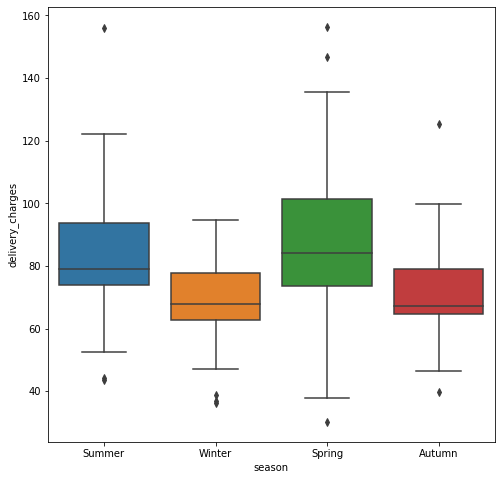

In [25]:
plt.figure(figsize=(8, 8))
# boxplot of delivery_charge vs seasons
ax = sns.boxplot(y="delivery_charges", x="season", data=outlier_data)

#### Since delivery_charges are calculated with repect to a model which depends linearly on the attributes: coupon_discount, delivery_charges, the ordered quantity values in the shopping_cart attribute for different seasons. We can say that the delivery_cahrges for a particular season follow the same distribution. We can use this information to remove the outliers from the outlier_data.

In [26]:
# indexes to be dropped
idx = []
# calcluating q1, q3 and iqr to remove outliers based on season delivery charge
for seas in outlier_data.season.unique():
    # defining season mask
    mask = outlier_data['season'] == seas
    # lower quartile
    q1 = outlier_data.delivery_charges[mask].quantile(0.25)
    # upper quartile
    q3 = outlier_data.delivery_charges[mask].quantile(0.75)
    # inter-quartile range
    iqr = q3 - q1
    # extending the idx list if the entry is an outlier
    idx.extend(outlier_data[(outlier_data['delivery_charges'] < (q1-1.5*iqr)) | (outlier_data['delivery_charges'] > (q3+1.5*iqr))][mask].index.values)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


#### We store the index of the rows containing the outliers in a list idx. We use the limit (q1-1.5 x iqr, q3+1.5 x iqr) to remove the outliers. Next we drop these indexes from the outlier_data. 

In [27]:
# dropping the indexes with outliers
outlier_data = outlier_data.drop(idx)

#### We observe that the outliers have been removed from the data.

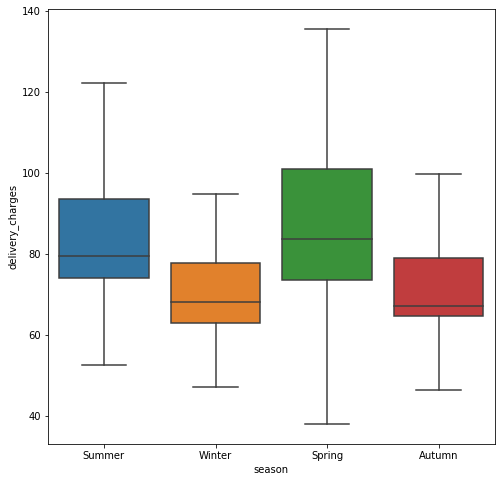

In [28]:
plt.figure(figsize=(8, 8))
# boxplot of the cleaned data
ax = sns.boxplot(y="delivery_charges", x="season", data=outlier_data)

In [29]:
# write to csv
outlier_data.to_csv('30830192_outlier_data_solution.csv', index=False)

## 6. Imputing missing values in the missing_data.

#### The count for missing values in each column have been displayed below. The columns nearest_warehouse, order_price, order_total, delivery_charges, order_total, distance_to_nearest_warehouse and is_happy_customer have null values. These can be fixed using the dirty_data functions defined in task 1.

In [30]:
# count of null values in columns
missing_data.isnull().sum()

order_id                          0
customer_id                       0
date                              0
nearest_warehouse                55
shopping_cart                     0
order_price                      15
delivery_charges                 40
customer_lat                      0
customer_long                     0
coupon_discount                   0
order_total                      15
season                            0
is_expedited_delivery             0
distance_to_nearest_warehouse    31
latest_customer_review            0
is_happy_customer                40
dtype: int64

#### A peek into missing_data.

In [31]:
missing_data.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD425890,ID0702376794,2019-08-12,Thompson,"[('Olivia x460', 2), ('iAssist Line', 1), ('Un...",8125.0,77.17,-37.808200,144.939850,5,7795.92,Winter,True,0.8069,great phone and amazing value!!! love all the ...,1.0
1,ORD359404,ID0723959155,2019-09-27,Bakers,"[('Lucent 330S', 1), ('Candle Inferno', 1), ('...",8160.0,79.65,-37.802345,145.004816,15,7015.65,Spring,False,1.1983,very good deal this phone is in good condition...,NaN
2,ORD480713,ID2174963236,2019-04-16,Thompson,"[('Toshika 750', 1), ('iStream', 2)]",4620.0,79.47,-37.819216,144.954201,0,4699.47,Autumn,True,0.9612,"practical, economical, and best features! love...",1.0
3,ORD335746,ID0060653725,2019-04-14,Thompson,"[('Candle Inferno', 2), ('Toshika 750', 2)]",9500.0,64.70,-37.812870,144.942999,0,9564.70,Autumn,False,0.3586,recomiendo la compra el redmi funciona perfect...,1.0
4,ORD456583,ID0267318384,2019-10-18,Nickolson,"[('Universe Note', 2), ('Olivia x460', 2), ('p...",26420.0,89.11,-37.824604,144.958342,0,26509.11,Spring,True,1.1912,it desn't work it doesn't work with verizon li...,0.0


#### Firstly the idexes of rows with missing values have been stored in the idx. Then we iterate through these indexes in the idx to fix the missing values. We check for missing values in the nearest_warehouse column and the distance_to_nearest_warehouse and fix it by calling the dirty_dist function. Next we check for null values in the order_price and calculate the price using q_mat and item_price. Next if the order_total has missing values we calculate them using the price(1-d) + delivery_charge. Next if the delivery_chages have missing values we calcualte them using total - price(1-d). We calculate the missing values in is_happy_customer by setting them equal to 1 if the customer_review has None or if the compound polarity score of customer_review is greater than 0.05

In [32]:
# indexes of rows with missing values
idx = missing_data[missing_data.isnull().any(axis=1)].index.values

# iterating over rows with NaNs
for i in idx:
    
    # if missing value in nearest_warehouse or distance_to_nearest_warehouse
    if pd.isna(missing_data.nearest_warehouse[i]) | pd.isna(missing_data.distance_to_nearest_warehouse[i]):
        # calling the dirty_dist function
        dist = dirty_dist(missing_data.customer_lat[i], missing_data.customer_long[i])
        min_dist = min(dist)
        # imputing the missing values
        missing_data.distance_to_nearest_warehouse[i] = min_dist
        missing_data.nearest_warehouse[i] = warehouse.names[dist.index(min_dist)]
        
    # if missing value in order_price
    if pd.isna(missing_data.order_price[i]):
        q_mat = [0]*10
        
        for item in eval(missing_data.shopping_cart[i]):
            q_mat[cart_items.index(item[0])] = item[1]
        # calculating the order price by mulitpling the vectors    
        missing_data.order_price[i] = np.dot(q_mat, item_price)
    
    # if missing value in order total
    if pd.isna(missing_data.order_total[i]):
        # order_price(1-d/100) + delivery_charge
        missing_data.order_total[i] = missing_data.order_price[i]*(1 - missing_data.coupon_discount[i]/100) + missing_data.delivery_charges[i]
    
    # if missing value in delivery charge
    if pd.isna(missing_data.delivery_charges[i]):
        # order_total - order_price(1-d/100)
        missing_data.delivery_charges[i] = missing_data.order_total[i] - missing_data.order_price[i]*(1 - missing_data.coupon_discount[i]/100)
    
    # if missing value in customer review
    if pd.isna(missing_data.is_happy_customer[i]):
        # if review is none
        if missing_data.latest_customer_review[i] == 'None':
            missing_data.is_happy_customer[i] = 1
        
        else:
            sid = SentimentIntensityAnalyzer()
            # 1 if compound polarity score > 0.05 else 0
            missing_data.is_happy_customer[i] = (1 if sid.polarity_scores(missing_data.latest_customer_review[i])['compound'] >= 0.05 else 0)   

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [33]:
# write to csv
missing_data.to_csv('30830192_missing_data_solution.csv', index=False)